In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

%matplotlib inline

import os
from os import listdir
from os.path import isfile, join

from keras.models import load_model
from sklearn.ensemble import RandomForestClassifier

In [2]:
#!pip install --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org tensorflow

In [4]:
root_dir = './images/'
sorted_food_dirs = sorted(os.listdir(root_dir))
sorted_food_dirs=sorted_food_dirs[1:]
sorted_food_dirs
from keras.preprocessing import image
name=[]
picture=[]
for i in sorted_food_dirs:
    food_dir = i
    all_files = os.listdir(os.path.join(root_dir, food_dir))
    j=0
    while j<20:
        rand_img = np.random.choice(all_files)
        path=os.path.join(root_dir, food_dir, rand_img)
        img = image.load_img(path,grayscale=True)
        x=image.img_to_array(img)
        if x.shape[0]==512:
            if x.shape[1]==512:
                picture.append(x) 
                name.append(food_dir)
                j=j+1
len(picture)

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [ ]:
import pandas as pd
Food_matrix=pd.DataFrame({"name":name,"picture":picture})

In [ ]:
Food_matrix.tail()

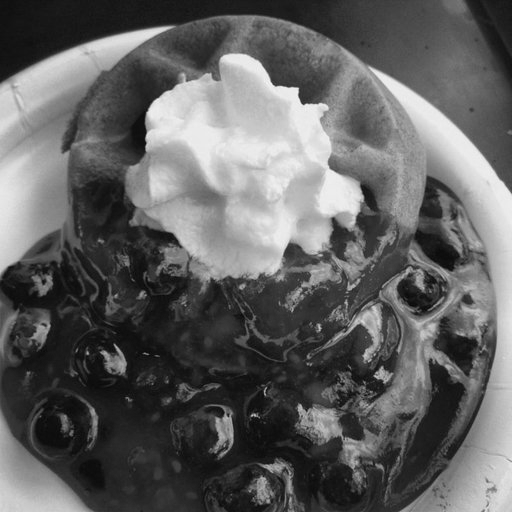

In [126]:
img

In [127]:
X=Food_matrix.picture
y=Food_matrix.name
X[0].shape

(512, 512, 1)

In [128]:
X[100].shape

(512, 512, 1)

In [129]:
for i in range(0,len(X)):
    ndims=X[i].shape[1]*X[i].shape[2]
    X[i]=X[i].reshape(X[i].shape[0],ndims).reshape(-1,1)   

In [130]:
for i in range(0,len(X)):
    ndims=X[i].shape[0]*X[i].shape[1]
    X[i]=X[i].reshape(ndims)

In [131]:
X.shape

(2020,)

In [132]:
X_list=[]
for i in range(0,len(X)):
    X_list.append(X[i].tolist())    
len(X_list)

2020

In [133]:
%timeit
rf = RandomForestClassifier(n_estimators=200,random_state=0)
rf = rf.fit(X_list, y)
rf.score(X_list,y)

1.0

In [134]:
predictor=rf.predict(X_list[0:10])
predictor

array(['apple_pie', 'apple_pie', 'apple_pie', 'apple_pie', 'apple_pie',
       'apple_pie', 'apple_pie', 'apple_pie', 'apple_pie', 'apple_pie'],
      dtype=object)

In [135]:
name_test=[]
picture_test=[]
for i in sorted_food_dirs:
    food_dir = i
    all_files = os.listdir(os.path.join(root_dir, food_dir))
    j=0
    while j<1:
        rand_img = np.random.choice(all_files)
        path=os.path.join(root_dir, food_dir, rand_img)
        img = image.load_img(path,grayscale=True)
        x=image.img_to_array(img)
        if x.shape[0]==512:
            if x.shape[1]==512:
                picture_test.append(x) 
                name_test.append(food_dir)
                j=j+1
len(picture_test)

/Users/olgaromanova/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


101

In [136]:
Food_matrix_test=pd.DataFrame({"name_test":name_test,"picture_test":picture_test})
Food_matrix_test.head(3)

name_test                                       picture_test
0       apple_pie  [[[37.0], [39.0], [44.0], [48.0], [50.0], [53....
1  baby_back_ribs  [[[6.0], [12.0], [9.0], [6.0], [11.0], [8.0], ...
2         baklava  [[[195.0], [191.0], [193.0], [197.0], [199.0],...

In [137]:
X_test=Food_matrix_test.picture_test
y_test=Food_matrix_test.name_test

In [138]:
for i in range(0,len(X_test)):
    ndims=X_test[i].shape[1]*X_test[i].shape[2]
    X_test[i]=X_test[i].reshape(X_test[i].shape[0],ndims).reshape(-1,1) 
for i in range(0,len(X_test)):
    ndims=X_test[i].shape[0]*X_test[i].shape[1]
    X_test[i]=X_test[i].reshape(ndims)

In [139]:
X_list_test =[]
for i in range(0,len(X_test)):
    X_list_test.append(X_test[i].tolist())    
len(X_list_test)

101

In [140]:
rf.score(X_list_test,y_test)

0.039603960396039604

In [141]:
predictor=rf.predict(X_list_test[0:10])
predictor

array(['apple_pie', 'hot_and_sour_soup', 'caprese_salad', 'pho',
       'ravioli', 'donuts', 'chocolate_mousse', 'club_sandwich',
       'ice_cream', 'steak'], dtype=object)

In [142]:
tt=pd.DataFrame({"actual":y_test[0:10],"predicted":predictor})
tt

actual          predicted
0          apple_pie          apple_pie
1     baby_back_ribs  hot_and_sour_soup
2            baklava      caprese_salad
3     beef_carpaccio                pho
4       beef_tartare            ravioli
5         beet_salad             donuts
6           beignets   chocolate_mousse
7           bibimbap      club_sandwich
8      bread_pudding          ice_cream
9  breakfast_burrito              steak